### 使用pytorch获得Voc2012数据集

pytorch TORCHVISION.DATASETS.VOC自带有多种数据集的下载

In [ ]:
import os
import torch 
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms # pytorch计算机视觉库，含多种数据集
import torchvision
from torch.autograd import Variable
from torch.utils.data import DataLoader
import cv2 # opencv

data_path = os.path.dirname(os.getcwd())+"/data"
# 训练集
train_dataset = datasets.MNIST(root=data_path,train=True,transform=transforms.ToTensor(),download=False)
# 测试集
test_dataset = datasets.MNIST(root=data_path,train=False,transform=transforms.ToTensor(),download=False)



# VGG16 

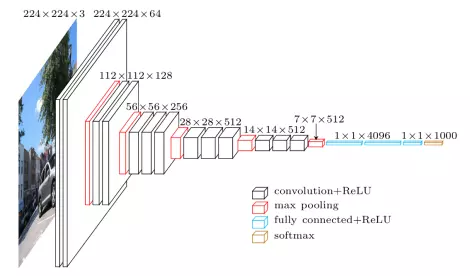

- INPUT: [224x224x3]        memory:  224*224*3=150K   weights: 0
- CONV3-64: [224x224x64]  memory:  224*224*64=3.2M   weights: (3*3*3)*64 = 1,728
- CONV3-64: [224x224x64]  memory:  224*224*64=3.2M   weights: (3*3*64)*64 = 36,864
- POOL2: [112x112x64]  memory:  112*112*64=800K   weights: 0
- CONV3-128: [112x112x128]  memory:  112*112*128=1.6M   weights: (3*3*64)*128 = 73,728
- CONV3-128: [112x112x128]  memory:  112*112*128=1.6M   weights: (3*3*128)*128 = 147,456
- POOL2: [56x56x128]  memory:  56*56*128=400K   weights: 0
- CONV3-256: [56x56x256]  memory:  56*56*256=800K   weights: (3*3*128)*256 = 294,912
- CONV3-256: [56x56x256]  memory:  56*56*256=800K   weights: (3*3*256)*256 = 589,824
- CONV3-256: [56x56x256]  memory:  56*56*256=800K   weights: (3*3*256)*256 = 589,824
- POOL2: [28x28x256]  memory:  28*28*256=200K   weights: 0
- CONV3-512: [28x28x512]  memory:  28*28*512=400K   weights: (3*3*256)*512 = 1,179,648
- CONV3-512: [28x28x512]  memory:  28*28*512=400K   weights: (3*3*512)*512 = 2,359,296
- CONV3-512: [28x28x512]  memory:  28*28*512=400K   weights: (3*3*512)*512 = 2,359,296
- POOL2: [14x14x512]  memory:  14*14*512=100K   weights: 0
- CONV3-512: [14x14x512]  memory:  14*14*512=100K   weights: (3*3*512)*512 = 2,359,296
- CONV3-512: [14x14x512]  memory:  14*14*512=100K   weights: (3*3*512)*512 = 2,359,296
- CONV3-512: [14x14x512]  memory:  14*14*512=100K   weights: (3*3*512)*512 = 2,359,296
- POOL2: [7x7x512]  memory:  7*7*512=25K  weights: 0
- FC: [1x1x4096]  memory:  4096  weights: 7*7*512*4096 = 102,760,448
- FC: [1x1x4096]  memory:  4096  weights: 4096*4096 = 16,777,216
- FC: [1x1x1000]  memory:  1000 weights: 4096*1000 = 4,096,000

### Network Architecture
### 输入
- 224x224x3 三通道图片

In [ ]:
class VGG16(nn.Module):
    def __init__(self):
        super(VGG16,self).__init__()
        
        self.conv1_1 = nn.Conv2d(3,64,3)
        